# Neurone formel
### Modules necessaires :
- NUMPY 1.16.3
- MATPLOTLIB : 3.0.3
- TENSORFLOW : 1.13.1

In [1]:
from numpy import array, random
import numpy as np
from math import exp
from tqdm import tqdm

# Codons notre premier neurone formel "From Scratch"

Voici un exemple de programme de neurone formel pour bien comprendre toute la mécanique de l'apprentissage à travers un exemple concret.

## Les données d'apprentissage

La première chose nous allons créer nos données d'apprentissage et définir le taux d'apprentissage


In [2]:
#-------------------------------------
#    OBSERVATIONS ET PREDICTIONS
#-------------------------------------

observations_entrees = array([[1, 0], [1, 1], [0, 1], [0, 0]])
print(observations_entrees)

predictions = array([[0], [1], [0], [0]])
print(predictions)

[[1 0]
 [1 1]
 [0 1]
 [0 0]]
[[0]
 [1]
 [0]
 [0]]


## Définition des poids

On génère les poids de façon aléatoire, dans l'intervalle de valeur [-1,1]

In [3]:
#--------------------------------------
#        PARAMETRAGE DU PERCEPTRON
#--------------------------------------

#Génération des poids dans l'interval [-1;1]

random.seed(1)
borneMin = -1
borneMax = 1

w11 = (borneMax-borneMin) * random.random() + borneMin
w21 = (borneMax-borneMin) * random.random() + borneMin

> Le biais qui aura pour valeur 1 et le poids sera égal à 0.

In [4]:
#Le biais
biais = 1
wb = 0

#Stockage des poids initiaux, uniquement pour affichage à la fin de l'apprentissage
poids = [w11, w21, wb]; print(poids)

[-0.165955990594852, 0.4406489868843162, 0]


## Gestion des hyperparamètres

In [5]:
#Taux d'apprentissage
txApprentissage = 0.1

#Nombres d'epoques
epochs = 30000

## Codage de fonctions utiles

Le code ci-dessous représente les différentes fonctions dont nous aurons besoin à savoir:

- Le calcul de la somme pondérée
- Le calcul de la fonction d'activation de type sigmoïde 
- Le calcul de l'erreur linéaire
- Le calcul du gradient
- Le calcul de la valeur d'ajustement du poids
- Le calcul de la nouvelle valeur du poids
- Le calcul de la fonction d'erreur moyenne quadratique (MSE)

In [6]:
#--------------------------------------
#       FONCTIONS UTILES
#--------------------------------------

def somme_ponderee(X1, W11, X2, W21, biais, WB):
    return X1*W11 + X2*W21 + biais*WB
 
def fonction_activation_sigmoide(valeur_somme_ponderee):
    return 1 / (1 + exp(-valeur_somme_ponderee))

def fonction_activation_relu(valeur_somme_ponderee):
    return max(0, valeur_somme_ponderee)

def erreur_lineaire(valeur_attendue, valeur_predite):
    return valeur_attendue - valeur_predite

def calcul_gradient(valeur_entree, prediction, erreur):
    return -erreur * prediction * (1-prediction) * valeur_entree

def calcul_valeur_ajustement(valeur_gradient, taux_apprentissage):
    return valeur_gradient * taux_apprentissage

def calcul_nouveau_poids(valeur_poids, valeur_ajustement):
    return valeur_poids - valeur_ajustement

def calcul_MSE(predictions_realisees, predictions_attendues):
    return np.mean((predictions_attendues - predictions_realisees)**2)

In [7]:
#--------------------------------------
#       GRAPHIQUE
#--------------------------------------

Graphique_MSE=[]

## Apprentissage!

Maintenant que nous disposons de tout ce dont nous avons besoin, nous pouvons passer à la phase d'apprentissage.

Pour mener à bien cette phase d'apprentissage, nous allons 
* réaliser plusieurs époques (epoch), c'est-à-dire plusieurs passages complets de l'ensemble des observations contenues dans notre jeu de données à travers notre neurone formel. 
* réaliser pour chaque observation une prédiction et calculer l'erreur pour ensuite procéder à la mise à jour des poids synaptiques.


In [8]:
#--------------------------------------
#    APPRENTISSAGE
#--------------------------------------

for epoch in tqdm(range(epochs)):
    predictions_realisees_durant_epoch = []
    for numObservation, observation in enumerate(observations_entrees):
        #Chargement de la couche d'entrée
        x1 = observation[0];
        x2 = observation[1];

        #Valeur de prédiction attendue
        valeur_attendue = predictions[numObservation, 0]

        #Etape 1 : Calcul de la somme ponderee
        valeur_somme_ponderee = somme_ponderee(x1, w11, x2, w21, biais, wb)

        #Etape 2 : Application de la fonction d'activation
        valeur_predite = fonction_activation_sigmoide(valeur_somme_ponderee)

        #Etape 3 : Calcul de l'erreur
        valeur_erreur = erreur_lineaire(valeur_attendue, valeur_predite)

        #Mise à jour du poids 1
        #Calcul du gradient de la valeur d'ajustement et du nouveau poids
        gradient_W11 = calcul_gradient(x1, valeur_predite, valeur_erreur)
        valeur_ajustement_W11 = calcul_valeur_ajustement(gradient_W11, txApprentissage)
        w11 = calcul_nouveau_poids(w11, valeur_ajustement_W11)

        # Mise à jour du poids 2
        gradient_W21 = calcul_gradient(x2, valeur_predite, valeur_erreur)
        valeur_ajustement_W21 = calcul_valeur_ajustement(gradient_W21, txApprentissage)
        w21 = calcul_nouveau_poids(w21, valeur_ajustement_W21)

        # Mise à jour du poids du biais
        gradient_Wb = calcul_gradient(biais, valeur_predite, valeur_erreur)
        valeur_ajustement_Wb = calcul_valeur_ajustement(gradient_Wb, txApprentissage)
        wb = calcul_nouveau_poids(wb, valeur_ajustement_Wb)

        #Stockage de la prediction realisee:
        predictions_realisees_durant_epoch.append([valeur_predite])

    MSE = calcul_MSE(array(predictions_realisees_durant_epoch), predictions)
    Graphique_MSE.append(MSE)

print("MSE : "+str(Graphique_MSE[0]))
print("MSE : "+str(Graphique_MSE[-1]))

100%|█████████████████████████████████████████████████| 30000/30000 [00:01<00:00, 17716.42it/s]

MSE : 0.25523306014932345
MSE : 0.0008055775737514613


Après exécution du code, on constate que la fonction d'erreur diminue au fil du temps, ce qui montre que notre neurone formel est bien en train d'apprendre.

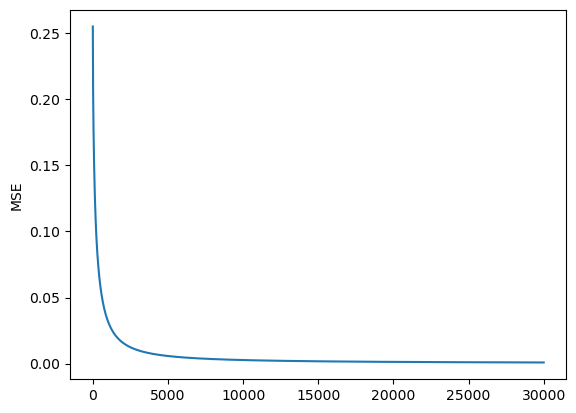

In [9]:
import matplotlib.pyplot as plt
plt.plot(Graphique_MSE)
plt.ylabel('MSE')
plt.show()

> Mais avons-nous atteint le point de convergence?

On voit bien d'après le graphe une diminution de l'erreur puis un léger palier pour ensuite reprendre la descente, mais cela ne nous indique pas si la convergence a été atteinte, on peut juste en déduire qu'avec une fonction d'erreur montrant un taux de 8% et vu l'allure de la courbe, nous pouvons encore espérer de meilleurs résultats.

> Essayez de modifier le nombre d'epochs en le passant à 1000000 et à relancer l'apprentissage (attention, cela peut prendre du temps). Cette énorme valeur a volontairement été choisie pour vous montrer que notre algorithme continue toujours à améliorer son apprentissage, mais de façon très minime puisque la courbe de la fonction d'erreur semble se stabiliser.

## Tests de prédictions

Essayons à présent de réaliser quelques prédictions pour vérifier le bon fonctionnement de notre neurone artificiel.

Dans un premier temps, nous allons changer le nombre d'epochs pour le mettre à 3000.

Ajoutons quelques lignes qui vont nous permettre de connaître les poids issus de l'apprentissage :

In [10]:
print ("Apprentissage terminé !")
print ("Poid initiaux: " )
print ("W11 = "+str(poids[0]))
print ("W21 = "+str(poids[1]))
print ("Wb = "+str(poids[2]))

print ("Poid finaux: " )
print ("W11 = "+str(w11))
print ("W21 = "+str(w21))
print ("Wb = "+str(wb))



Apprentissage terminé !
Poid initiaux: 
W11 = -0.165955990594852
W21 = 0.4406489868843162
Wb = 0
Poid finaux: 
W11 = 6.7246558825847655
W21 = 6.724449848957169
Wb = -10.175421122608702


Puis réalisons une prédiction :

In [11]:
print()
print("--------------------------")
print ("PREDICTION ")
print("--------------------------")
x1 = 1
x2 = 1


--------------------------
PREDICTION 
--------------------------


In [12]:
#Etape 1 : Calcul de la somme ponderee
valeur_somme_ponderee = somme_ponderee(x1, w11, x2, w21, biais, wb)

In [13]:
#Etape 2 : Application de la fonction d'activation
valeur_predite = fonction_activation_sigmoide(valeur_somme_ponderee)
#valeur_predite = fonction_activation_relu(valeur_somme_ponderee)

In [14]:
print("Prediction du [" + str(x1) + "," + str(x2)  + "]")
print("Prediction = " + str(valeur_predite))

Prediction du [1,1]
Prediction = 0.96351492161306
